In [1]:
# This is mainly copied or modified from https://github.com/ctgk/PRML
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

In [3]:
np.random.seed(1234)

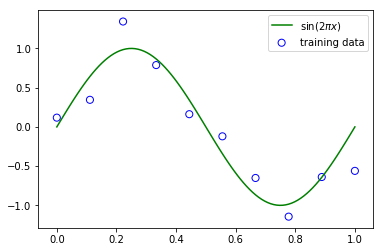

In [4]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

train_sz = 10
test_sz = 100
std_error = 0.25
x_train, y_train = create_toy_data(func, train_sz, std_error)
x_test, y_test = create_toy_data(func, test_sz, std_error)
y_true = func(x_test)

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_true, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

# Linear Regression

Model 0 [-0.03592087]
Model 1 [ 0.78301942 -1.63788059]
Model 3 [ 1.13336032e-02  9.29216157e+00 -2.67894422e+01  1.70372865e+01]
Model 9 [ 1.17858791e-01 -3.22314291e+01  5.52576193e+02 -2.72857332e+03
  4.76278430e+03  2.03128886e+03 -1.93595365e+04  2.83824707e+04
 -1.78561842e+04  4.24672692e+03]


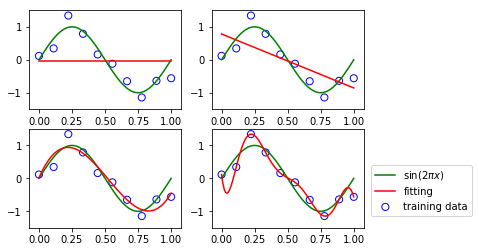

In [5]:
from sklearn.preprocessing import PolynomialFeatures

for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeatures(degree)
    X_train = feature.fit_transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f'Model {degree} {model.coef_}')
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_true, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

# RMSE

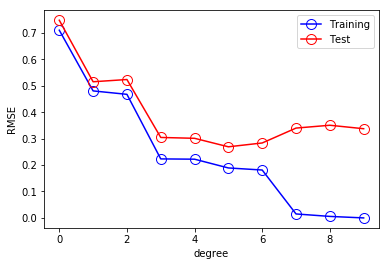

In [6]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeatures(i)
    X_train = feature.fit_transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

# Ridge Regression

Model 9 with coefs [  0.17738452   5.3259915  -10.02296846  -4.31669469   1.82171781
   4.53464928   4.39548565   2.42934319  -0.60977998  -4.23603437]


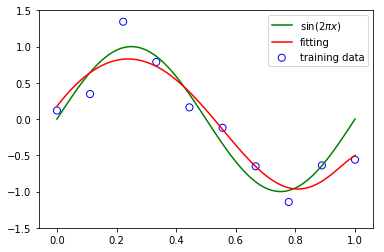

In [7]:
degrees = 9
feature = PolynomialFeatures(degrees)
X_train = feature.fit_transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)
print(f"Model {degrees} with coefs {model.w}")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_true, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

# Bayesion regression

model w mean [  0.17738452   5.3259915  -10.02296846  -4.31669469   1.82171781
   4.53464928   4.39548565   2.42934319  -0.60977998  -4.23603437] and w precision [[20.002      10.          7.03703704  5.55555556  4.67398262  4.09236397
   3.68208324  3.37883227  3.14687537  2.9647631 ]
 [10.          7.03903704  5.55555556  4.67398262  4.09236397  3.68208324
   3.37883227  3.14687537  2.9647631   2.818839  ]
 [ 7.03703704  5.55555556  4.67598262  4.09236397  3.68208324  3.37883227
   3.14687537  2.9647631   2.818839    2.69999294]
 [ 5.55555556  4.67398262  4.09236397  3.68408324  3.37883227  3.14687537
   2.9647631   2.818839    2.69999294  2.60191296]
 [ 4.67398262  4.09236397  3.68208324  3.37883227  3.14887537  2.9647631
   2.818839    2.69999294  2.60191296  2.52008641]
 [ 4.09236397  3.68208324  3.37883227  3.14687537  2.9647631   2.820839
   2.69999294  2.60191296  2.52008641  2.45120054]
 [ 3.68208324  3.37883227  3.14687537  2.9647631   2.818839    2.69999294
   2.60391296  2.

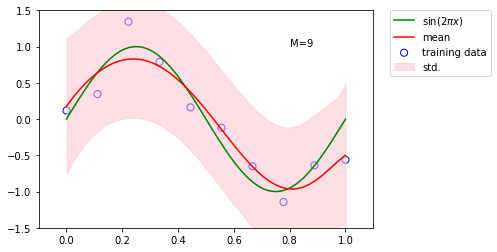

In [10]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)
print(f"model w mean {model.w_mean} and w precision {model.w_precision}")

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_true, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test.ravel(), y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()